### Goal

This jupyter script is an exercise that I had picked up on [realpython](https://realpython.com/pandas-project-gradebook/), in which the author walks his/her readers through a series of steps to evaluate the homework, quiz and exam scores of each student in a class, to produce a final letter grade.

I wanted to see if I could reproduce the results without referring to the author's answer sheets, which may be found on [github](https://github.com/realpython/materials/tree/master/pandas-gradebook-project?__s=pdv57urqg0i5yprtujkk). Let's go!


In [1]:
import pandas as pd

# Sample of my final results: each row in my output table should correspond to a single student + all of his/her data
headers = ['Identifier','Name','Homework','Quizzes','Exams','Final score',
           'Final grade']
row1 = ['Student 1','Last, First','#','#','#','#','A-F']
row2 = ['Student 2','Last, First','#','#','#','#','A-F']

final_output = pd.DataFrame(columns=headers)
final_output.loc[0] = row1
final_output.loc[1] = row2

final_output

,Identifier,Name,Homework,Quizzes,Exams,Final score,Final grade
0,Student 1,"Last, First",#,#,#,#,A-F
1,Student 2,"Last, First",#,#,#,#,A-F


### 1) Load data

I will be working with three sets of data, downloaded [here](https://github.com/realpython/materials/tree/master/pandas-gradebook-project/data):
- roster.csv: containing the roster information for a single class, such as the different teaching and meeting times of students of that class as well as basic information like student names, IDs, and email addresses.
- grades.csv: containing the homework and exam scores of each student, including submission time. 
- quiz_grades.csv: containing each students' quiz grade. 


In [2]:
# Import packages
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load roster dataframe
roster_df = pd.read_csv('./data/roster.csv')
roster_df.head()

,ID,Name,NetID,Email Address,Section
0,1234567,"Barrera Jr., Woody",WXB12345,WOODY.BARRERA_JR@UNIV.EDU,1
1,2345678,"Lambert, Malaika",MXL12345,MALAIKA.LAMBERT@UNIV.EDU,2
2,3456789,"Joyce, Traci",TXJ12345,TRACI.JOYCE@UNIV.EDU,1
3,4567890,"Flower, John Gregg",JGF12345,JOHN.G.2.FLOWER@UNIV.EDU,3
4,8406082,"Johnson, Stacy Michael",SMJ00936,STACY.JOHNSON@UNIV.EDU,2


In [4]:
# Load homework and exam data using glob
homework_exam_df = pd.DataFrame()

homework_exam_csv_list = glob.glob('./data/*Grades.csv')

for a in homework_exam_csv_list:
    homework_exam_df = homework_exam_df.append(pd.read_csv(a))
    print(len(homework_exam_df))
    
homework_exam_df.head()

56
107
150


,Unnamed: 0,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,...,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total Homework,Average Homework,Homework Score,Final Score
0,ara97741,amy.adams@univ.edu,1,Amy,Adams,49,80,53,80,55,...,100,76,100,0.87,0.74,0.76,0.729730,0.741377,0.741377,NaN
1,cxa22039,christina.allen@univ.edu,1,Christina,Allen,63,80,78,80,76,...,100,67,100,0.60,0.70,0.67,0.832432,0.830425,0.832432,NaN
2,lxb98047,lucas.baldwin@univ.edu,1,Lucas,Baldwin,79,80,50,80,77,...,100,97,100,0.83,0.74,0.97,0.856757,0.846230,0.856757,NaN
3,wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55,80,62,80,73,...,100,90,100,0.86,0.62,0.90,0.808108,0.799405,0.808108,NaN
4,jxb40799,john.bauer@univ.edu,1,John,Bauer,57,80,70,80,73,...,100,92,100,0.64,0.88,0.92,0.843243,0.837651,0.843243,NaN


In [5]:
# Import quiz data using glob
quiz_df = pd.DataFrame()

quiz_csv_list = glob.glob('./data/quiz*.csv')

for a in quiz_csv_list:
    quiz_df = quiz_df.append(pd.read_csv(a))
    print(len(quiz_df))
    
quiz_df.reset_index(inplace=True)
quiz_df = quiz_df.iloc[:,1:]
quiz_df.head()

150
300
450
600
750


,Last Name,First Name,Email,Grade
0,Bennett,Richard,richard.bennett@univ.edu,10
1,Parker,Timothy,timothy.parker@univ.edu,9
2,Reyes,Carol,carol.reyes@univ.edu,5
3,Powers,Brooke,brooke.powers@univ.edu,6
4,Taylor,Michael,michael.taylor@univ.edu,5


In [6]:
# Looks like there are only 150 students in the homework_exam_df, but 750 in the quiz_df (lengths)
print(quiz_df['Email'].nunique()) # but, there are only 150 unique students in quiz_df

# Check the grades of the duplicated student list
from collections import defaultdict

dup_check = defaultdict(list)

for i,j in quiz_df.iterrows():
    dup_check[j['Email']].append(j['Grade'])
    
dup_check # Seems like there are different grades recorded.. which makes sense, since I imported 4 separate quiz csv files     

150


defaultdict(list,
            {'richard.bennett@univ.edu': [10, 6, 9, 8, 10],
             'timothy.parker@univ.edu': [9, 14, 13, 14, 10],
             'carol.reyes@univ.edu': [5, 15, 8, 14, 6],
             'brooke.powers@univ.edu': [6, 10, 17, 10, 8],
             'michael.taylor@univ.edu': [5, 15, 13, 12, 5],
             'belinda.bailey@univ.edu': [6, 10, 9, 14, 4],
             'marcia.stevens@univ.edu': [7, 15, 17, 10, 12],
             'katelyn.faulkner@univ.edu': [6, 12, 17, 14, 6],
             'william.daniel@univ.edu': [9, 10, 10, 9, 5],
             'dylan.johnson@univ.edu': [6, 9, 15, 5, 10],
             'sandra.thomas@univ.edu': [9, 10, 14, 8, 4],
             'richard.saunders@univ.edu': [10, 8, 15, 12, 12],
             'tiffany.ortega@univ.edu': [7, 8, 15, 14, 12],
             'billy.schwartz@univ.edu': [11, 12, 11, 10, 9],
             'sara.vasquez@univ.edu': [5, 7, 8, 6, 5],
             'ashley.martin@univ.edu': [5, 7, 8, 13, 11],
             'oscar.rush@univ.ed

In [7]:
# The quiz grades are presented as their raw grades. I need to calculate the grades in % by dividing them with their maximum points, depending on the quiz taken (each has diff max points)
quiz_max_points = {'Quiz 1': 11, 'Quiz 2': 15, 'Quiz 3': 17, 'Quiz 4': 14, 'Quiz 5': 12}
quiz_final_grade = defaultdict(list)

for i in dup_check.values():
    raw_quiz_grades_list = i
    for a,b in enumerate(raw_quiz_grades_list):
        quiz_number = f"Quiz {a+1}"
        quiz_grade = b/quiz_max_points[quiz_number]
        quiz_final_grade[quiz_number].append(quiz_grade)
        
assert len(quiz_final_grade['Quiz 1']) == len(quiz_final_grade['Quiz 2']) == len(quiz_final_grade['Quiz 3']) == len(quiz_final_grade['Quiz 4'])


In [8]:
quiz_df_2 = pd.concat([quiz_df.drop_duplicates('Email'), pd.DataFrame(quiz_final_grade)], axis=1).drop(['Grade'], axis=1)
quiz_df_2['Avg quiz grade'] = quiz_df_2.mean(axis=1)
quiz_df_2.head()

,Last Name,First Name,Email,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Avg quiz grade
0,Bennett,Richard,richard.bennett@univ.edu,0.909091,0.400000,0.529412,0.571429,0.833333,0.648653
1,Parker,Timothy,timothy.parker@univ.edu,0.818182,0.933333,0.764706,1.000000,0.833333,0.869911
2,Reyes,Carol,carol.reyes@univ.edu,0.454545,1.000000,0.470588,1.000000,0.500000,0.685027
3,Powers,Brooke,brooke.powers@univ.edu,0.545455,0.666667,1.000000,0.714286,0.666667,0.718615
4,Taylor,Michael,michael.taylor@univ.edu,0.454545,1.000000,0.764706,0.857143,0.416667,0.698612


### 2) Merge all dataframes into one

- First, I will merge the roster df with the homework and exam df
- Then, I will merge this with the quiz df
- Unique identifiers in each df vary

In [9]:
# Unique identifiers for the roster and homework an exam dfs are the IDs

# In the roster df, this column is named as NetID, whereas the latter is nameless: 'Unnamed: 0'

# Change latter df ID column name
homework_exam_df.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
homework_exam_df.head(3)

,ID,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,...,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total Homework,Average Homework,Homework Score,Final Score
0,ara97741,amy.adams@univ.edu,1,Amy,Adams,49,80,53,80,55,...,100,76,100,0.87,0.74,0.76,0.729730,0.741377,0.741377,NaN
1,cxa22039,christina.allen@univ.edu,1,Christina,Allen,63,80,78,80,76,...,100,67,100,0.60,0.70,0.67,0.832432,0.830425,0.832432,NaN
2,lxb98047,lucas.baldwin@univ.edu,1,Lucas,Baldwin,79,80,50,80,77,...,100,97,100,0.83,0.74,0.97,0.856757,0.846230,0.856757,NaN


In [10]:
# Make sure all ID characters are capitalized
roster_df['NetID'] = roster_df['NetID'].str.upper()
homework_exam_df['ID'] = homework_exam_df['ID'].str.upper()

# Check if the number of unique IDs from each df are the same. Has to be
assert roster_df['NetID'].nunique() == homework_exam_df['ID'].nunique()

In [11]:
# Merge dfs
merged_df1 = pd.merge(roster_df, homework_exam_df, left_on='NetID', right_on='ID', how='outer')
merged_df1.head(3) # Noticed that there are columns that are possibly duplicates

,ID_x,Name,NetID,Email Address_x,Section_x,ID_y,Email Address_y,Section_y,First Name,Last Name,...,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total Homework,Average Homework,Homework Score,Final Score
0,1234567,"Barrera Jr., Woody",WXB12345,WOODY.BARRERA_JR@UNIV.EDU,1,WXB12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,...,100,90,100,0.86,0.62,0.90,0.808108,0.799405,0.808108,NaN
1,2345678,"Lambert, Malaika",MXL12345,MALAIKA.LAMBERT@UNIV.EDU,2,MXL12345,malaika.lambert@univ.edu,2,Malaika,Lambert,...,100,93,100,0.60,0.91,0.93,0.827027,0.818944,0.827027,0.839419
2,3456789,"Joyce, Traci",TXJ12345,TRACI.JOYCE@UNIV.EDU,1,TXJ12345,traci.joyce@univ.edu,1,Traci,Joyce,...,100,64,100,1.00,0.84,0.64,0.785135,0.785940,0.785940,NaN


In [12]:
# Determine columns that may be duplicates
duplicate_list = []

for a in merged_df1.columns:
    if '_x' in a:
        duplicate_list.append(a)
    elif '_y' in a:
        duplicate_list.append(a)

duplicate_list

['ID_x',
 'Email Address_x',
 'Section_x',
 'ID_y',
 'Email Address_y',
 'Section_y']

In [13]:
# Duplicate values within the duplicate columns? Do a rough check
print((merged_df1['Email Address_x'].str.upper() == merged_df1['Email Address_y'].str.upper()).value_counts())
print((merged_df1['ID_x'] == merged_df1['ID_y']).value_counts())
print((merged_df1['Section_x'] == merged_df1['Section_y']).value_counts())

# We see that the IDs in both _x and _y columns are different from each other, but it doesn't matter
print(f"there are {merged_df1['ID_x'].nunique()} unique IDs in ID_x, and {merged_df1['ID_y'].nunique()} unique IDs in ID_y column")

# Get rid of duplicate columns
for a in merged_df1.columns:
    if '_x' in a:
        merged_df1.drop([a], axis=1, inplace=True)
    else:
        pass

merged_df1.columns = merged_df1.columns.str.replace('_y','')

merged_df1.head()

True    150
dtype: int64
False    150
dtype: int64
True    150
dtype: int64
there are 150 unique IDs in ID_x, and 150 unique IDs in ID_y column


,Name,NetID,ID,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,...,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total Homework,Average Homework,Homework Score,Final Score
0,"Barrera Jr., Woody",WXB12345,WXB12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55,80,62,...,100,90,100,0.86,0.62,0.90,0.808108,0.799405,0.808108,NaN
1,"Lambert, Malaika",MXL12345,MXL12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63,80,57,...,100,93,100,0.60,0.91,0.93,0.827027,0.818944,0.827027,0.839419
2,"Joyce, Traci",TXJ12345,TXJ12345,traci.joyce@univ.edu,1,Traci,Joyce,0,80,77,...,100,64,100,1.00,0.84,0.64,0.785135,0.785940,0.785940,NaN
3,"Flower, John Gregg",JGF12345,JGF12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69,80,52,...,100,77,100,0.72,0.83,0.77,0.770270,0.765710,0.770270,0.773689
4,"Johnson, Stacy Michael",SMJ00936,SMJ00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74,80,55,...,100,86,100,0.96,0.80,0.86,0.782432,0.787742,0.787742,0.806827


In [14]:
# Merge above df with the quiz dataframe. Use email address

# Confirm same number of unique email addresses
merged_df1['Email Address'].nunique() == quiz_df['Email'].nunique()

# This time, instead of combining all columns, I only want the Grade column. Everything else are repeats
merged_df2 = pd.merge(left=merged_df1, right=quiz_df_2, left_on='Email Address',right_on='Email',
                      how='outer').drop(['Email','NetID'], axis=1)

merged_df2.head()

,Name,ID,Email Address,Section,First Name_x,Last Name_x,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,...,Homework Score,Final Score,Last Name_y,First Name_y,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Avg quiz grade
0,"Barrera Jr., Woody",WXB12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55,80,62,80,...,0.808108,NaN,Barrera,Woody,0.363636,0.666667,0.647059,0.500000,0.833333,0.602139
1,"Lambert, Malaika",MXL12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63,80,57,80,...,0.827027,0.839419,Lambert,Malaika,0.727273,0.666667,0.588235,0.928571,0.500000,0.682149
2,"Joyce, Traci",TXJ12345,traci.joyce@univ.edu,1,Traci,Joyce,0,80,77,80,...,0.785940,NaN,Joyce,Traci,0.727273,0.400000,0.823529,0.642857,0.333333,0.585399
3,"Flower, John Gregg",JGF12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69,80,52,80,...,0.770270,0.773689,Flower,John,0.727273,0.533333,0.470588,0.928571,0.416667,0.615286
4,"Johnson, Stacy Michael",SMJ00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74,80,55,80,...,0.787742,0.806827,Johnson,Stacy,0.545455,0.933333,0.647059,0.500000,0.583333,0.641836


### 3) Calculate the weighted grades

- The following shows the respective weights to each assessment type (whether homework, exam, or quiz)

In [15]:
categories = ['Exam 1 Score','Exam 2 Score','Exam 3 Score','Quiz Score',
              'Homework Score']
percent_final_grade = [5,10,15,30,40]
weight = [x/100 for x in percent_final_grade]

weights_df = pd.DataFrame(list(zip(categories,percent_final_grade,weight)), columns=['Category','Percent of Final Grade','Weight'])

print(weights_df)

# Converting it into a dictionary so that the multiplication of assessment scores with their respective weights is easier
weights_dict = dict(zip(weights_df['Category'], weights_df['Weight']))
weights_dict


         Category  Percent of Final Grade  Weight
0    Exam 1 Score                       5    0.05
1    Exam 2 Score                      10    0.10
2    Exam 3 Score                      15    0.15
3      Quiz Score                      30    0.30
4  Homework Score                      40    0.40


{'Exam 1 Score': 0.05,
 'Exam 2 Score': 0.1,
 'Exam 3 Score': 0.15,
 'Quiz Score': 0.3,
 'Homework Score': 0.4}

- The weighted grade can be calculated by multiplying each given weight as above with their respective assessment score

### 3.1) Calculate weighted exam grades

In [16]:
grades_df = merged_df2.copy()

# How many exams are there?
exam_list = []

for a in grades_df.columns: # ignore max points in our calculation
    if ('EXAM' in a.upper()) and ('MAX POINT' not in a.upper()):
        exam_list.append(a)
    else:
        print(f"{a} does not contain exam scores")

Name does not contain exam scores
ID does not contain exam scores
Email Address does not contain exam scores
Section does not contain exam scores
First Name_x does not contain exam scores
Last Name_x does not contain exam scores
Homework 1 does not contain exam scores
Homework 1 - Max Points does not contain exam scores
Homework 2 does not contain exam scores
Homework 2 - Max Points does not contain exam scores
Homework 3 does not contain exam scores
Homework 3 - Max Points does not contain exam scores
Homework 4 does not contain exam scores
Homework 4 - Max Points does not contain exam scores
Homework 5 does not contain exam scores
Homework 5 - Max Points does not contain exam scores
Homework 6 does not contain exam scores
Homework 6 - Max Points does not contain exam scores
Homework 7 does not contain exam scores
Homework 7 - Max Points does not contain exam scores
Homework 8 does not contain exam scores
Homework 8 - Max Points does not contain exam scores
Homework 9 does not contain

In [17]:
# Multiply the exam weights with scores
exam_grades_df = grades_df[['ID'] + exam_list[3:]]

weighted_exam_grades_dict = {}

for a in exam_grades_df.columns:
    try: 
        weighted_exam_grades_dict[a] = exam_grades_df[a].apply(lambda x: x * weights_dict[a])
    except:
        pass
    
weighted_exam_grades_dict = pd.DataFrame(weighted_exam_grades_dict).rename(columns=lambda x: x + '_weighted')

# Combine with exam grades df
exam_grades_weighted_df = pd.concat([weighted_exam_grades_dict,exam_grades_df], axis=1)
exam_grades_weighted_df.head()



,Exam 1 Score_weighted,Exam 2 Score_weighted,Exam 3 Score_weighted,ID,Exam 1 Score,Exam 2 Score,Exam 3 Score
0,0.043,0.062,0.1350,WXB12345,0.86,0.62,0.90
1,0.030,0.091,0.1395,MXL12345,0.60,0.91,0.93
2,0.050,0.084,0.0960,TXJ12345,1.00,0.84,0.64
3,0.036,0.083,0.1155,JGF12345,0.72,0.83,0.77
4,0.048,0.080,0.1290,SMJ00936,0.96,0.80,0.86


### 3.2) Calculate weighted homework grades

In [18]:
# Again, determine how many homeworks (which columns) there are
homework_list = []

for a in grades_df.columns: 
    if ('HOMEWORK' in a.upper()):
        print(a) # We see 10 homeworks in total, and various columns..
        homework_list.append(a)

Homework 1
Homework 1 - Max Points
Homework 2
Homework 2 - Max Points
Homework 3
Homework 3 - Max Points
Homework 4
Homework 4 - Max Points
Homework 5
Homework 5 - Max Points
Homework 6
Homework 6 - Max Points
Homework 7
Homework 7 - Max Points
Homework 8
Homework 8 - Max Points
Homework 9
Homework 9 - Max Points
Homework 10
Homework 10 - Max Points
Total Homework
Average Homework
Homework Score


In [19]:
# Explore the diff between the columns
grades_df[homework_list].head(10) # Seems like the homework scores have already been calculated, will proceed to use it for the calculation

,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,Homework 4,Homework 4 - Max Points,Homework 5,Homework 5 - Max Points,...,Homework 7 - Max Points,Homework 8,Homework 8 - Max Points,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Total Homework,Average Homework,Homework Score
0,55,80,62,80,73,80,83,100,68,70,...,50,43,70,45,60,46,60,0.808108,0.799405,0.808108
1,63,80,57,80,78,80,83,100,61,70,...,50,58,70,45,60,37,60,0.827027,0.818944,0.827027
2,0,80,77,80,58,80,91,100,66,70,...,50,69,70,59,60,53,60,0.785135,0.785940,0.785940
3,69,80,52,80,64,80,75,100,61,70,...,50,43,70,42,60,40,60,0.770270,0.765710,0.770270
4,74,80,55,80,60,80,67,100,46,70,...,50,42,70,59,60,48,60,0.782432,0.787742,0.787742
5,53,80,56,80,48,80,87,100,46,70,...,50,57,70,56,60,36,60,0.710811,0.708837,0.710811
6,64,80,52,80,57,80,84,100,54,70,...,50,45,70,38,60,45,60,0.724324,0.718012,0.724324
7,66,80,51,80,66,80,79,100,53,70,...,50,61,70,49,60,49,60,0.762162,0.765052,0.765052
8,70,80,80,80,55,80,84,100,42,70,...,50,60,70,45,60,52,60,0.825676,0.823409,0.825676
9,50,80,66,80,62,80,80,100,42,70,...,50,56,70,45,60,43,60,0.740541,0.738500,0.740541


In [20]:
# Calculate weighted homework grades
homework_grades_weighted_df = grades_df[['ID','Homework Score']]
homework_grades_weighted_df['Homework Score_weight'] = homework_grades_weighted_df['Homework Score']*weights_dict['Homework Score']
homework_grades_weighted_df.head(10)


<ipython-input-20-997eb1e93e94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homework_grades_weighted_df['Homework Score_weight'] = homework_grades_weighted_df['Homework Score']*weights_dict['Homework Score']


,ID,Homework Score,Homework Score_weight
0,WXB12345,0.808108,0.323243
1,MXL12345,0.827027,0.330811
2,TXJ12345,0.785940,0.314376
3,JGF12345,0.770270,0.308108
4,SMJ00936,0.787742,0.315097
5,RXS30280,0.710811,0.284324
6,DMA58910,0.724324,0.289730
7,HSW06874,0.765052,0.306021
8,BKR19538,0.825676,0.330270
9,LXC64780,0.740541,0.296216


### 3.3) Calculate weighted quiz grades

In [21]:
quiz_grades_weighted_df = quiz_df_2.copy()

quiz_grades_weighted_df['Quiz_grade_weight'] = quiz_grades_weighted_df['Avg quiz grade']*weights_dict['Quiz Score']
quiz_grades_weighted_df.head()

,Last Name,First Name,Email,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Avg quiz grade,Quiz_grade_weight
0,Bennett,Richard,richard.bennett@univ.edu,0.909091,0.400000,0.529412,0.571429,0.833333,0.648653,0.194596
1,Parker,Timothy,timothy.parker@univ.edu,0.818182,0.933333,0.764706,1.000000,0.833333,0.869911,0.260973
2,Reyes,Carol,carol.reyes@univ.edu,0.454545,1.000000,0.470588,1.000000,0.500000,0.685027,0.205508
3,Powers,Brooke,brooke.powers@univ.edu,0.545455,0.666667,1.000000,0.714286,0.666667,0.718615,0.215584
4,Taylor,Michael,michael.taylor@univ.edu,0.454545,1.000000,0.764706,0.857143,0.416667,0.698612,0.209584


### 3.4) Merge all weighted grades dfs into one, determine the corresponding letter grade for every score

In [22]:
# exam_grades_weighted_df (unique identifier: 'ID'), 
# homework_grades_weighted_df (unique identifier: 'ID')
# quiz_grades_weighted_df (unique identifier: 'emails')

homework_exam_grades_df_final = pd.merge(left=exam_grades_weighted_df, right=homework_grades_weighted_df,
                                         left_on='ID',right_on='ID')

# Get IDs for quiz_grades_df from the student emails
id_emails_df = pd.merge(left=quiz_grades_weighted_df[['Email']], right=homework_exam_df[['ID','Email Address']],
               left_on='Email', right_on=['Email Address'], how='outer')[['ID','Email Address']]

quiz_grades_weighted_df = pd.merge(left=id_emails_df, right=quiz_grades_weighted_df, left_on='Email Address', right_on='Email',
                        how='outer').drop(['Email'],axis=1)

homework_exam_quiz_grades_df_final = pd.merge(left=homework_exam_grades_df_final, right=quiz_grades_weighted_df,
                                              left_on='ID', right_on='ID', how='outer')

homework_exam_quiz_grades_df_final.head()


,Exam 1 Score_weighted,Exam 2 Score_weighted,Exam 3 Score_weighted,ID,Exam 1 Score,Exam 2 Score,Exam 3 Score,Homework Score,Homework Score_weight,Email Address,Last Name,First Name,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Avg quiz grade,Quiz_grade_weight
0,0.043,0.062,0.1350,WXB12345,0.86,0.62,0.90,0.808108,0.323243,woody.barrera_jr@univ.edu,Barrera,Woody,0.363636,0.666667,0.647059,0.500000,0.833333,0.602139,0.180642
1,0.030,0.091,0.1395,MXL12345,0.60,0.91,0.93,0.827027,0.330811,malaika.lambert@univ.edu,Lambert,Malaika,0.727273,0.666667,0.588235,0.928571,0.500000,0.682149,0.204645
2,0.050,0.084,0.0960,TXJ12345,1.00,0.84,0.64,0.785940,0.314376,traci.joyce@univ.edu,Joyce,Traci,0.727273,0.400000,0.823529,0.642857,0.333333,0.585399,0.175620
3,0.036,0.083,0.1155,JGF12345,0.72,0.83,0.77,0.770270,0.308108,john.g.2.flower@univ.edu,Flower,John,0.727273,0.533333,0.470588,0.928571,0.416667,0.615286,0.184586
4,0.048,0.080,0.1290,SMJ00936,0.96,0.80,0.86,0.787742,0.315097,stacy.johnson@univ.edu,Johnson,Stacy,0.545455,0.933333,0.647059,0.500000,0.583333,0.641836,0.192551


In [23]:
# Clean up df
homework_exam_quiz_grades_df_final.set_index(['ID','Email Address'], inplace=True)

for a in homework_exam_quiz_grades_df_final.columns:
    if 'weight' in a:
        pass
    else:
        homework_exam_quiz_grades_df_final.drop([a], axis=1, inplace=True)

homework_exam_quiz_grades_df_final['Final_grade_weighted'] = homework_exam_quiz_grades_df_final.sum(axis=1)        

In [24]:
# Assign letter grades: A (80-100%); B (60-79%); C (50-59%); F (<50%)
letter_grades = ['F','D','C','B','A']

homework_exam_quiz_grades_df_final['letter grade'] = pd.cut(homework_exam_quiz_grades_df_final['Final_grade_weighted'], 
                                                     bins=[0,0.6,0.7,0.8,0.9,1.0], labels=letter_grades, include_lowest=True)


In [25]:
homework_exam_quiz_grades_df_final.head()

,,Exam 1 Score_weighted,Exam 2 Score_weighted,Exam 3 Score_weighted,Homework Score_weight,Quiz_grade_weight,Final_grade_weighted,letter grade
ID,Email Address,,,,,,,
WXB12345,woody.barrera_jr@univ.edu,0.043,0.062,0.1350,0.323243,0.180642,0.743885,C
MXL12345,malaika.lambert@univ.edu,0.030,0.091,0.1395,0.330811,0.204645,0.795956,C
TXJ12345,traci.joyce@univ.edu,0.050,0.084,0.0960,0.314376,0.175620,0.719996,C
JGF12345,john.g.2.flower@univ.edu,0.036,0.083,0.1155,0.308108,0.184586,0.727194,C
SMJ00936,stacy.johnson@univ.edu,0.048,0.080,0.1290,0.315097,0.192551,0.764648,C


### 4) Summary statistics

In [26]:
# Seems like everyone either got an A or B
homework_exam_quiz_grades_df_final['letter grade'].value_counts()

C    115
B     26
D      9
A      0
F      0
Name: letter grade, dtype: int64

Text(0.5, 1.0, 'Distribution of final grades')

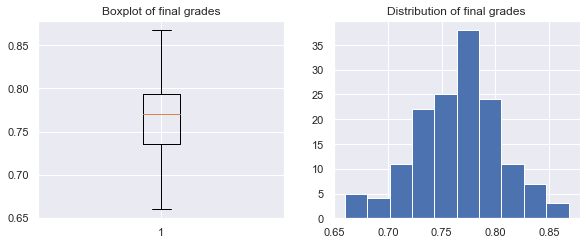

In [27]:
# Plot some visuals
sns.set()
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(231)
ax1.boxplot(homework_exam_quiz_grades_df_final['Final_grade_weighted'])
ax1.set_title("Boxplot of final grades")

ax2 = fig.add_subplot(232)
ax2.hist(homework_exam_quiz_grades_df_final['Final_grade_weighted'])
ax2.set_title("Distribution of final grades")

Text(0.5, 0, 'Distribution of final grades per class')

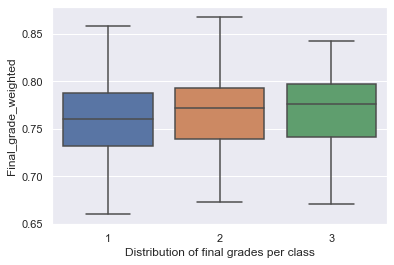

In [28]:
# Are there classes (out of the 3 classes/ sections as indicated in the roster file) that outperform others?
grades_sections_df = pd.merge(left=homework_exam_quiz_grades_df_final.reset_index(), right=roster_df[['NetID','Section']],
         left_on='ID', right_on='NetID', how='outer')

grades_sections_df['Section'] = grades_sections_df['Section'].astype('category')

sns.boxplot(x=grades_sections_df['Section'],y=grades_sections_df['Final_grade_weighted'])
plt.xlabel('Distribution of final grades per class')


#### Seems like the final grades of each student don't vary by much (20% diff between max and min grades), and the boxplots also show that there are massive overlaps between all final grades, suggesting that students in all three classes performed similarly (no correlation between any of the classes and student performance). Though, of course, this only pertains to the final grades, without considering each assessment type